# Série de Fourier Discreta (SFD)

## 1. Introdução

O espectro de frequências de um sinal periódico discreto $x[n]$ (sequência de valores discretos) com período fundamental $N_0$, é obtido via coeficientes da __Série de Fourier Discreta__:  

$$D[r]=\frac{1}{N_0}\sum_{n=0}^{N_0-1}x[n].e^{-\jmath \Omega_0 r n},\;\;\;\;\; 0\le r \le N_0-1 \tag 1$$   
$$x[n]=\sum_{r=0}^{N_0-1}D[r].e^{\jmath \Omega_0 r n},\;\;\;\;\; 0\le n \le N_0-1\;\;\text{com} \;\;\Omega_0=\frac{2\pi}{N_0} \tag 2$$

onde:	$D[r]$ são os coeficientes da Série de Fourier Discreta do sinal $x[n]$, também conhecidos por `coeficientes espectrais`.  

A equação (1) é chamada de __Equação de Análise de Fourier__ e a equação (2) é chamada de __Equação de Síntese de Fourier__.

Como a <mark>Série de Fourier para sinais de <b>tempo discreto</b></mark> é uma soma __finita__ de termos (convergência garantida), diferentemente do caso da <mark>Série de Fourier para sinais de <b>tempo contínuo</b></mark>, considerações sobre a convergência do somatório não são necessárias (condições de _Dirichlet_).


### Propriedades das Série de Fourier

<ol><li><b>Periodicidade</b> dos Coeficientes de Fourier:  

$D[r]=D[r+N_0]$</li>  
<p>
<li><b>Dualidade</b>:  

se $x[n] \leftrightarrow D[r]$ então $D[n]\leftrightarrow x[-r]/N_0$</li>  
  
<li><b>Reversão Temporal</b>:  

$\text{SFD}{x[-n]}=D[-r]$</li>  
<p>  
<li><b>Potência</b> (Teor. de Parseval):  
    
$\frac{1}{N_0}\sum_{n=<N_0>}^{} |x[n]|^2=\sum_{r=<N_0>}^{} |D[r]|^2$</li>  
  
<li><b>Deslocamento Temporal</b>:  
    
$x[n-n_0] \leftrightarrow e^{-\jmath \Omega_0 n_0 r} D[r]$ </li></ol>
  

## 2. Procedimentos

2.1 Determine os coeficientes $D[r]$ da SFD do sinal periódico $x[n]$:

![Sinal](img/proc1.png)  

A sequência $x[n]$ é a extensão periódica de `[1, 2/3, 1/3, 0]` com período fundamental $N_0 = 4$.  Assim:

$$\Omega_0 = 2\pi/N_0 = 2\pi/4 = \pi/2 \;\;(rad/amostra)$$
   
e:

$$e^{-j\Omega_0} = e^{-j\pi/2} = cos(\pi/2) – j.sen(\pi/2) = -j$$

Usando a equação de análise, equação (1): 

![Resolução](img/resol1.png)  

![Sinal e Espectro](img/sinal_espectro1.png)  

<figcaption><b>Figura 2</b> - Sinal $x[n]$ e seu espectro de frequências $D[r]$.</figcaption>

(-3.641592653589793, 3.641592653589793)

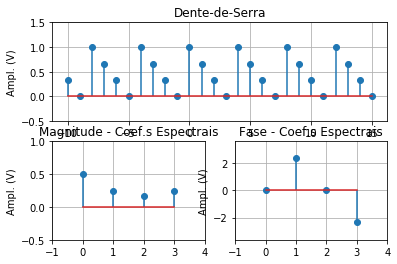

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 

n = np.arange(-10,16)              # base de tempo
N0 = 4                             # período (em amostras)
Omega0 = 2.*np.pi/N0               # freq. digital (rad/amostra)
xp = np.array([1.,2./3,1./3,0.])   # um período do sinal
x = xp[n%N0]                       # repetição de vários períodos
D = np.zeros((N0,),dtype=complex)  # vetor para coeficientes espectrais
for r in np.arange(0,N0):
    soma = 0.
    for m in np.arange(0,N0):
        soma += x[m] * np.exp(-1j*r*Omega0*m)
    D[r] = soma/N0

plt.subplot(2,1,1); plt.stem(n,x,use_line_collection=True); plt.ylabel('Ampl. (V)')
plt.grid('on'); plt.title('Dente-de-Serra'); plt.ylim(-0.5,1.5)

m = np.arange(0,N0)
plt.subplot(2,2,3); plt.stem(m,np.abs(D),use_line_collection=True); plt.ylabel('Ampl. (V)')
plt.grid('on'); plt.title('Magnitude - Coef.s Espectrais')
plt.xlim(-1,4); plt.ylim(-0.5,1.0)

plt.subplot(2,2,4); plt.stem(m,np.angle(D),use_line_collection=True); plt.ylabel('Ampl. (V)')
plt.grid('on'); plt.title('Fase - Coef.s Espectrais')
plt.xlim(-1,4); plt.ylim(-np.pi-0.5,np.pi+.5)

2.2 Calcule a potência do sinal do item anterior, no domínio do tempo e da frequência.  

2.3 Repita o procedimento 2.1 para os seguintes sinais:

a) $x[n-2]$  

A sequência $x[n-2]$ é a extensão periódica de `[1/3, 0, 1, 2/3]` com período fundamental $N_0 = 4$.  
![Deslocamento Temporal](img/resol2.png)  

b) $x[n-4]$  

c) $x[-n]$  

2.4 Suponha que o sinal $x[n]$ do procedimento 2.1 seja a resposta ao impulso de um SLITD e que o sinal da letra c) do procedimento 2.3 seja a entrada do SLITD.  Calcule a saída nos domínios do tempo e da frequência, bem como a potência da saída, também em ambos domínios.


## 3. Questões

1. Faça um _script_ para determinar os coeficientes $D[r]$ da SFD Exponencial Complexa do sinal $x[n-2]$, obtido a partir do sinal $x[n]$ mostrado a seguir, e trace o espectro de frequências e os sinais sintetizados.

![Trem de Pulsos](img/sinalQ1.png)  

2. Idem à questão anterior para o sinal $y[n]$ mostrado a seguir e para o sinal $|y[n]|$.  

![Trem de Pulsos Polarizados](img/sinalQ2.png)  

3. Desenvolva uma aplicação que exiba uma lista de sinais periódicos (pelo menos quatro sinais), e apresente o sinal escolhido pelo usuário no domínio do tempo (três ou mais períodos) e no domínio da frequência (espectro de frequência – magnitude e fase). O usuário poderá estabelecer o período, a fase e a amplitude de cada sinal escolhido.  

By **Prof. Cláudio A. Fleury**, Nov/19.